In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

%matplotlib inline

### 2019 Pudge

In [2]:
df_A = pd.read_csv('pudge_2019.csv')
df_A['hero_win'] = np.where((df_A['radiant_win']==True) & (df_A['is_radiant']==True), 1, 0)

df_A.head()

,match_id,start_time,duration,radiant_win,hero_id,account_id,patch,is_radiant,hero_win
0,5102790827,1573115470,1321,False,14,1009790652,7.22,0,0
1,4924718110,1564059644,1857,True,14,136177710,7.22,1,1
2,5080629141,1571745893,2532,False,14,103009158,7.22,1,0
3,4922778237,1563977318,3218,False,14,118078153,7.22,1,0
4,5056235679,1570299147,1444,True,14,167637574,7.22,0,0


In [3]:
df_A.describe()

,match_id,start_time,duration,hero_id,account_id,patch,is_radiant,hero_win
count,6.630000e+02,6.630000e+02,663.000000,663.0,6.630000e+02,663.000000,663.000000,663.000000
mean,4.900417e+09,1.564445e+09,2008.019608,14.0,3.097541e+08,7.218009,0.481146,0.245852
std,2.004273e+08,7.323339e+06,685.299217,0.0,2.507863e+08,0.005268,0.500022,0.430916
min,4.372442e+09,1.548769e+09,385.000000,14.0,1.782693e+06,7.200000,0.000000,0.000000
25%,4.777769e+09,1.558629e+09,1516.000000,14.0,1.388573e+08,7.210000,0.000000,0.000000
50%,4.956194e+09,1.565341e+09,1929.000000,14.0,2.165580e+08,7.220000,0.000000,0.000000
75%,5.058083e+09,1.570393e+09,2458.000000,14.0,3.734880e+08,7.220000,1.000000,0.000000
max,5.152490e+09,1.576216e+09,4588.000000,14.0,1.032890e+09,7.230000,1.000000,1.000000


### 2020 Pudge

In [4]:
df_B = pd.read_csv('pudge_2020.csv')
df_B['hero_win'] = np.where((df_B['radiant_win']==True) & (df_B['is_radiant']==True), 1, 0)

df_B.head()

,match_id,start_time,duration,radiant_win,hero_id,account_id,patch,is_radiant,hero_win
0,5544430486,1596151026,1141,False,14,111750003,7.27,1,0
1,5233328284,1581187840,1236,False,14,90180366,7.24,1,0
2,5743985488,1608075570,2155,True,14,174240675,7.27,1,1
3,5740063628,1607818120,2141,True,14,105045291,7.27,1,1
4,5737270674,1607639000,1392,False,14,84853828,7.27,0,0


In [5]:
df_B.describe()

,match_id,start_time,duration,hero_id,account_id,patch,is_radiant,hero_win
count,2.460000e+02,2.460000e+02,246.000000,246.0,2.460000e+02,246.000000,246.000000,246.000000
mean,5.504546e+09,1.594687e+09,1774.837398,14.0,4.226165e+08,7.261382,0.581301,0.264228
std,1.632175e+08,8.451648e+06,594.540891,0.0,3.641163e+08,0.011629,0.494352,0.441820
min,5.219383e+09,1.580462e+09,689.000000,14.0,2.807057e+07,7.240000,0.000000,0.000000
25%,5.360383e+09,1.587078e+09,1385.750000,14.0,1.426560e+08,7.250000,0.000000,0.000000
50%,5.539807e+09,1.595908e+09,1674.000000,14.0,2.508086e+08,7.270000,1.000000,0.000000
75%,5.643437e+09,1.601859e+09,2012.500000,14.0,8.420977e+08,7.270000,1.000000,1.000000
max,5.743985e+09,1.608076e+09,3955.000000,14.0,1.147159e+09,7.270000,1.000000,1.000000


### Compare Means of Groups

![means](z_test.png)

![p_hat](p_hat_definition.png)

In [6]:
n_A= len(df_A)
n_B = len(df_B)
p1 = df_A['hero_win'].mean()
p2 = df_B['hero_win'].mean()

p_hat = (n_A*p1 + n_B*p2) / (n_A+n_B)
z_win = (p2-p1) / np.sqrt(p_hat*(1-p_hat)*(1/n_A + 1/n_B))
z_win

0.5678104582555116

In [7]:
z_win_scipy = ttest_ind(df_A['hero_win'], df_B['hero_win'])

z_win_scipy

Ttest_indResult(statistic=-0.5672860731822452, pvalue=0.5706602109307418)

##  Compare Match Durations

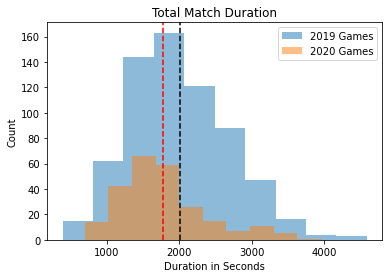

In [8]:
plt.title("Total Match Duration")
plt.hist(df_A['duration'], alpha = 0.5, label='2019 Games')
plt.hist(df_B['duration'], alpha=0.5, label='2020 Games')


plt.axvline(df_A['duration'].mean(), 
            linestyle='dashed', 
            linewidth=1.5, color='black')

plt.axvline(df_B['duration'].mean(), 
            linestyle='dashed', 
            linewidth=1.5,
            color='red')


plt.xlabel("Duration in Seconds")
plt.ylabel("Count")
plt.legend()
plt.savefig("match_durations.png")
plt.show()

In [9]:
ttest_ind(df_A['duration'], df_B['duration'])

Ttest_indResult(statistic=4.718158013262237, pvalue=2.754883822809766e-06)

In [10]:
ttest_ind(df_A['is_radiant'], df_B['is_radiant'])

Ttest_indResult(statistic=-2.6912300717497173, pvalue=0.007249924616666453)